# CORDIC core

This notebook visualizes various results obtained from the CORDIC core in [```rtl/cordic.v```](../rtl/cordic.v) using the [```tb/core_test.sv```](../tb/core_test.sv) testbench

---

In [4]:
# Import builtin libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

In [5]:
# Import custom utility python libraries from utils folder
sys.path.append("../utils/")
from logfile import *

---

# Rotation mode inputs

Look at the following plots to analyze coverage and overflow cases for rotation mode

Circular mode


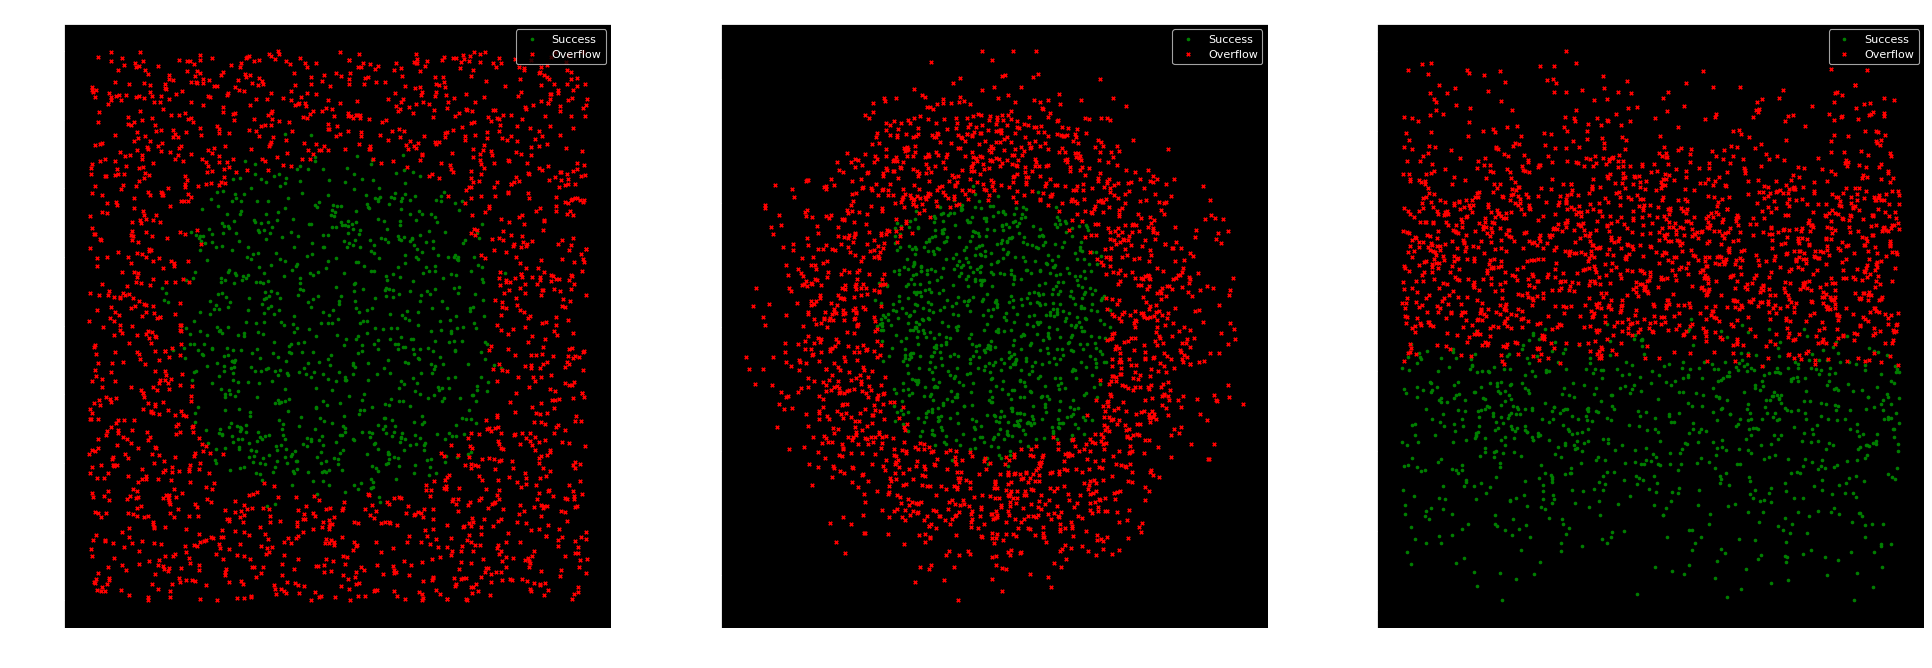

Hyperbolic mode


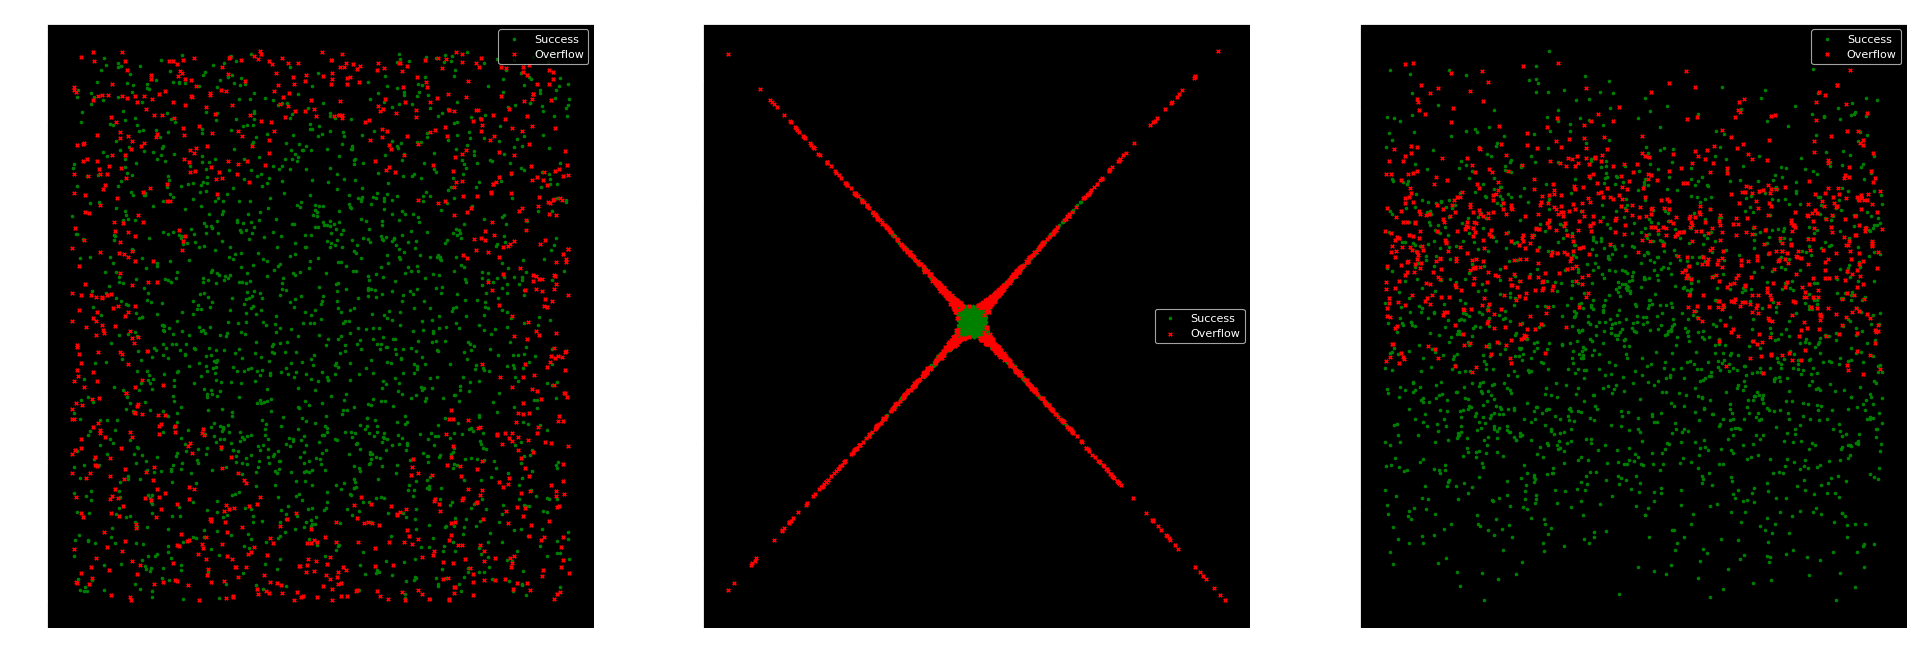

In [6]:
# View inputs for full (including inputs that will lead to out of bounds outputs)
print("Circular mode")
vis_rot_inputs_file("data/circ_rot/cr_30_off_off_x2500_full.txt")

print("Hyperbolic mode")
vis_rot_inputs_file("data/hyp_rot/hr_30_off_off_x2500_full.txt")

Circular mode


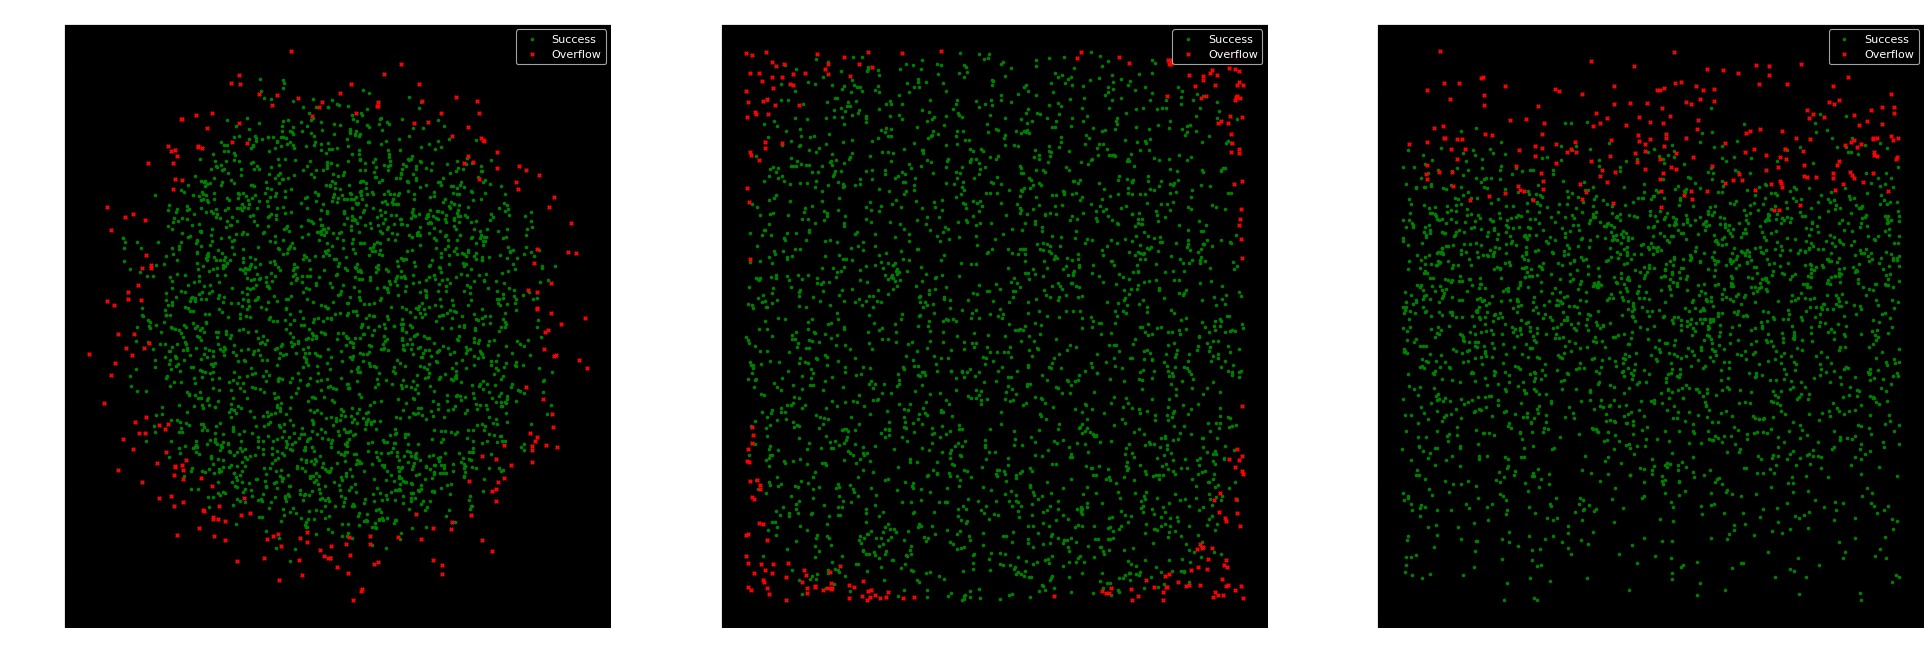

Hyperbolic mode


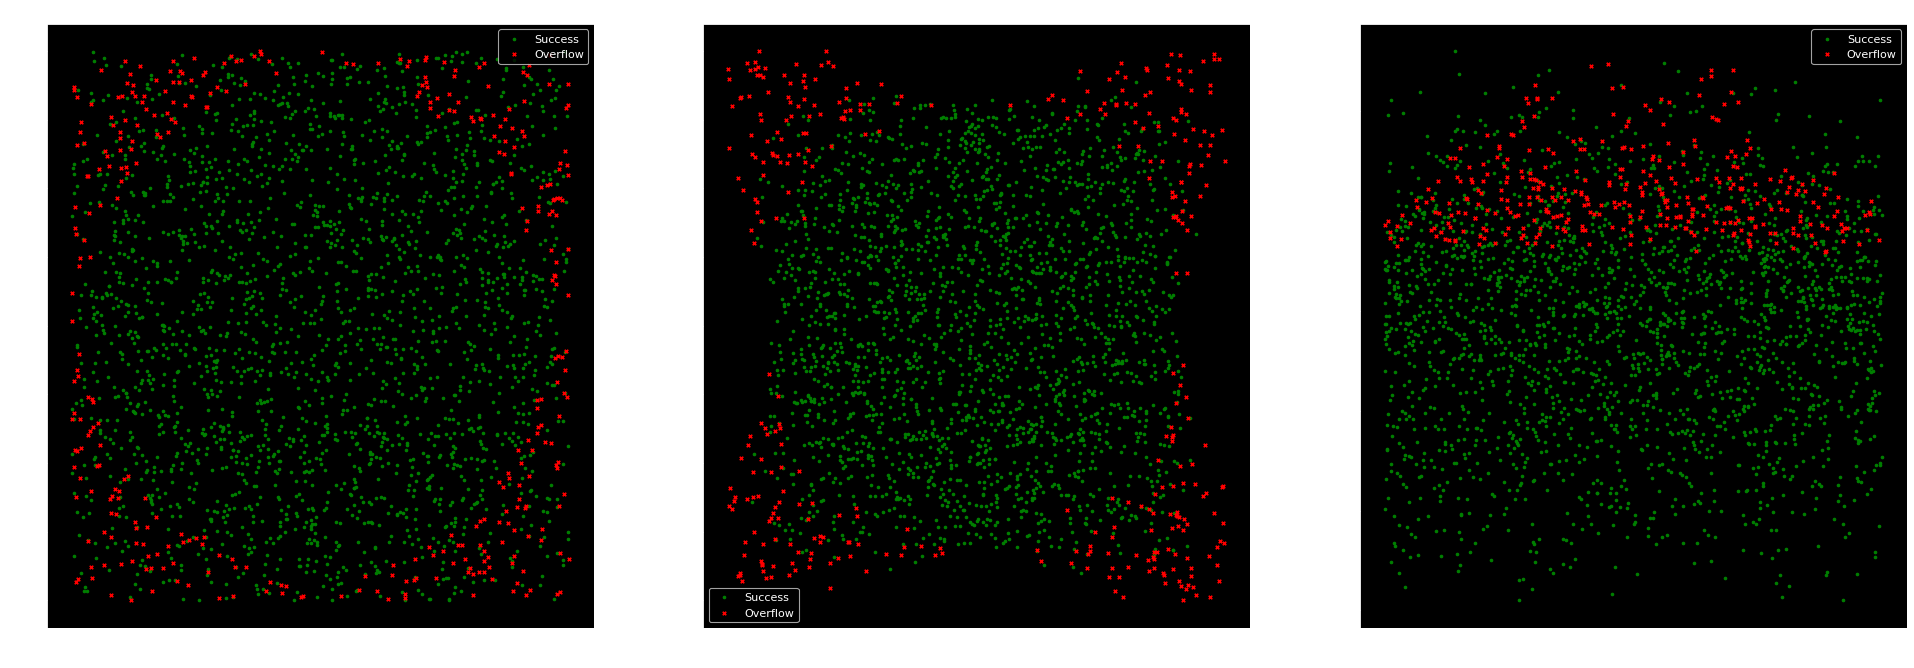

In [9]:
# View inputs without including those that will lead to out-of-bounds
print("Circular mode")
vis_rot_inputs_file("data/circ_rot/cr_30_off_off_x2500.txt")

print("Hyperbolic mode")
vis_rot_inputs_file("data/hyp_rot/hr_30_off_off_x2500.txt")

---

## Circular mode error analysis

Look at the following to see patterns in error for circular rotation mode for different number of CORDIC iterations and also compare the error plot when we do not apply the given constraints on angle, input values, etc

10 CORDIC iterations


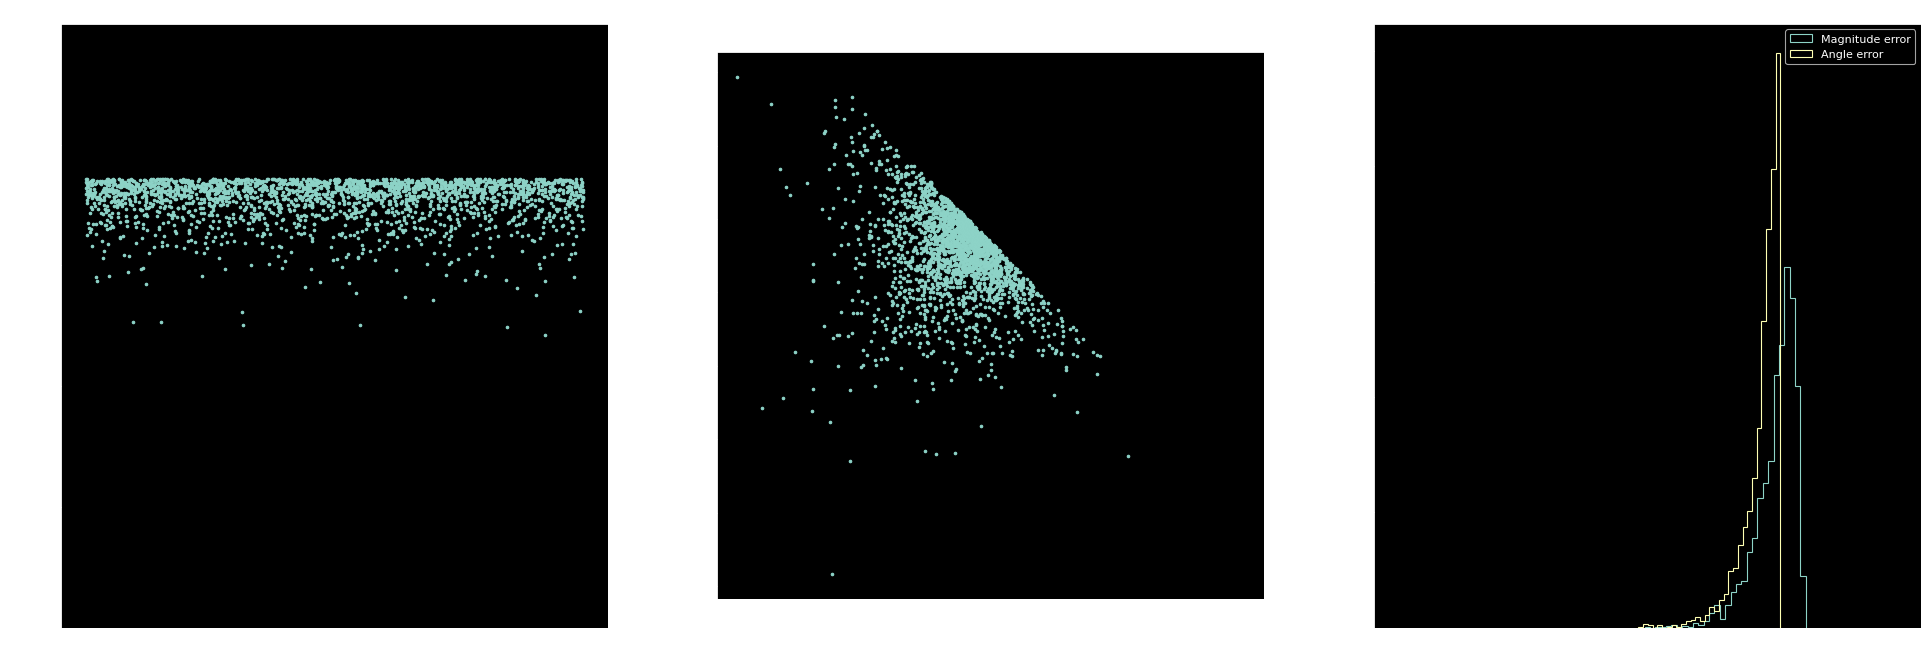

15 CORDIC iterations


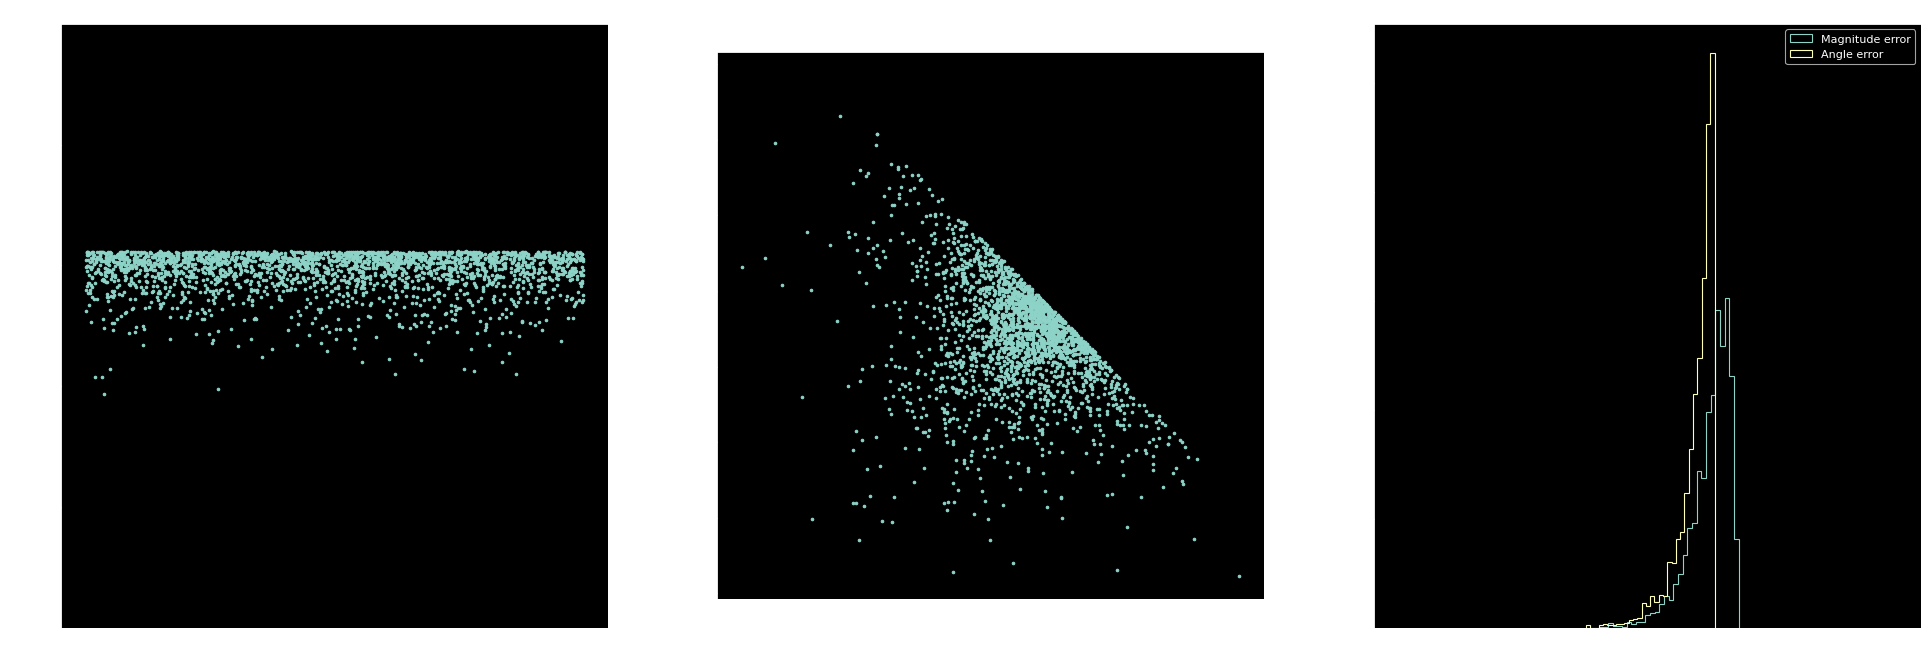

20 CORDIC iterations


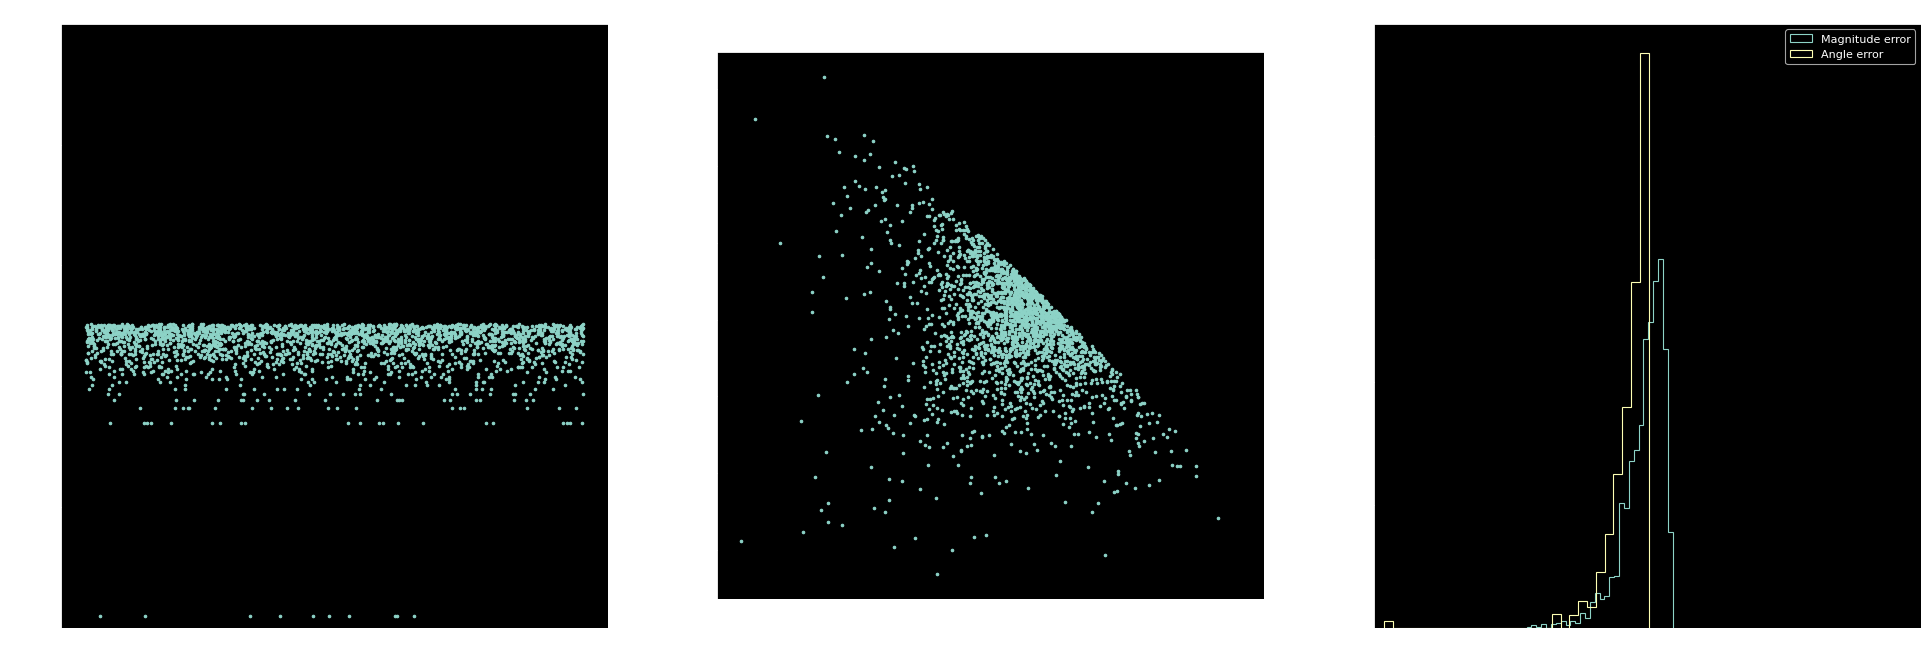

25 CORDIC iterations


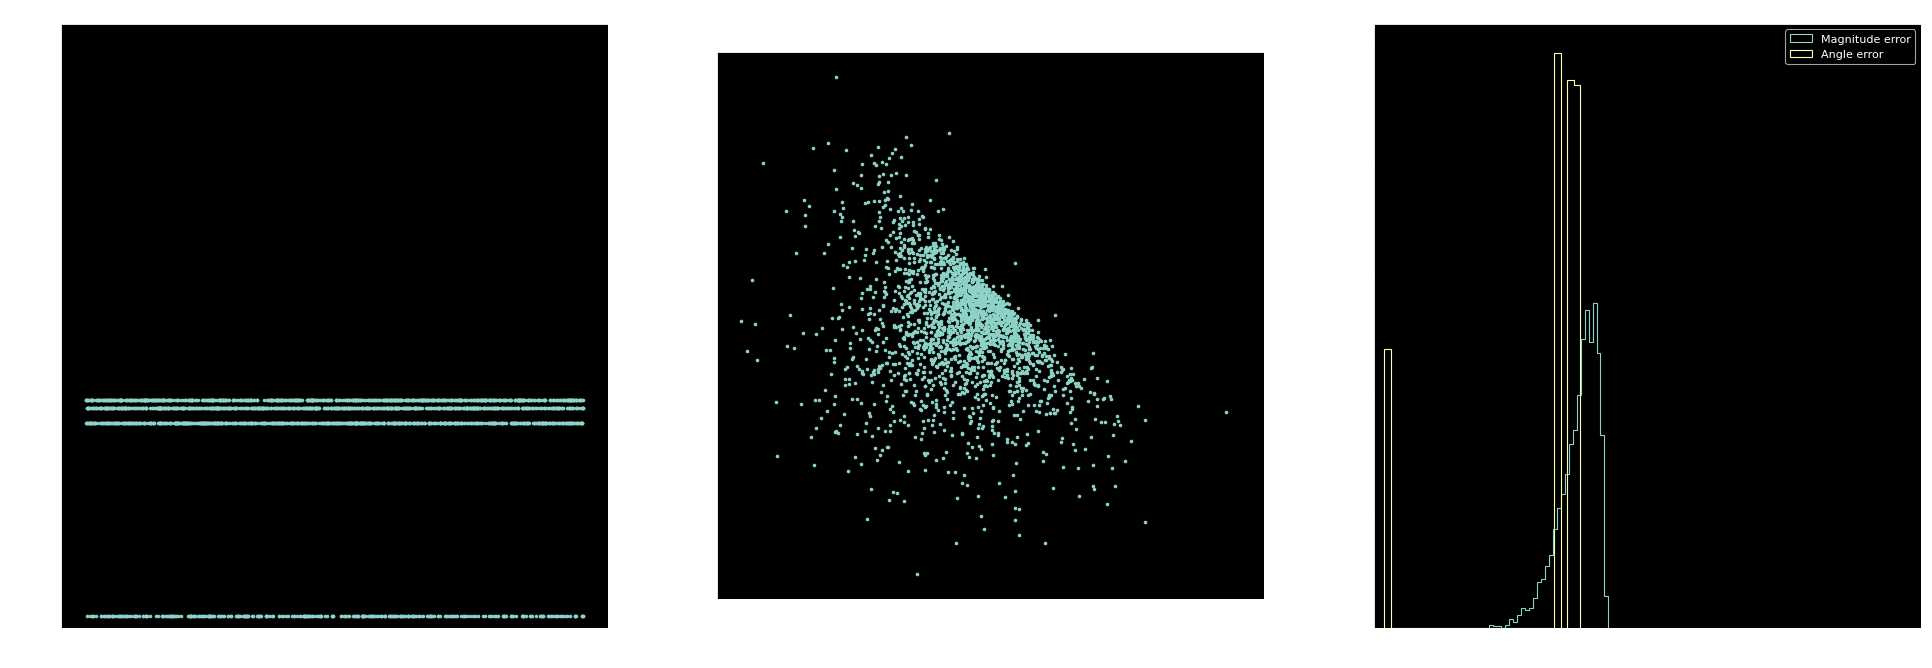

30 CORDIC iterations


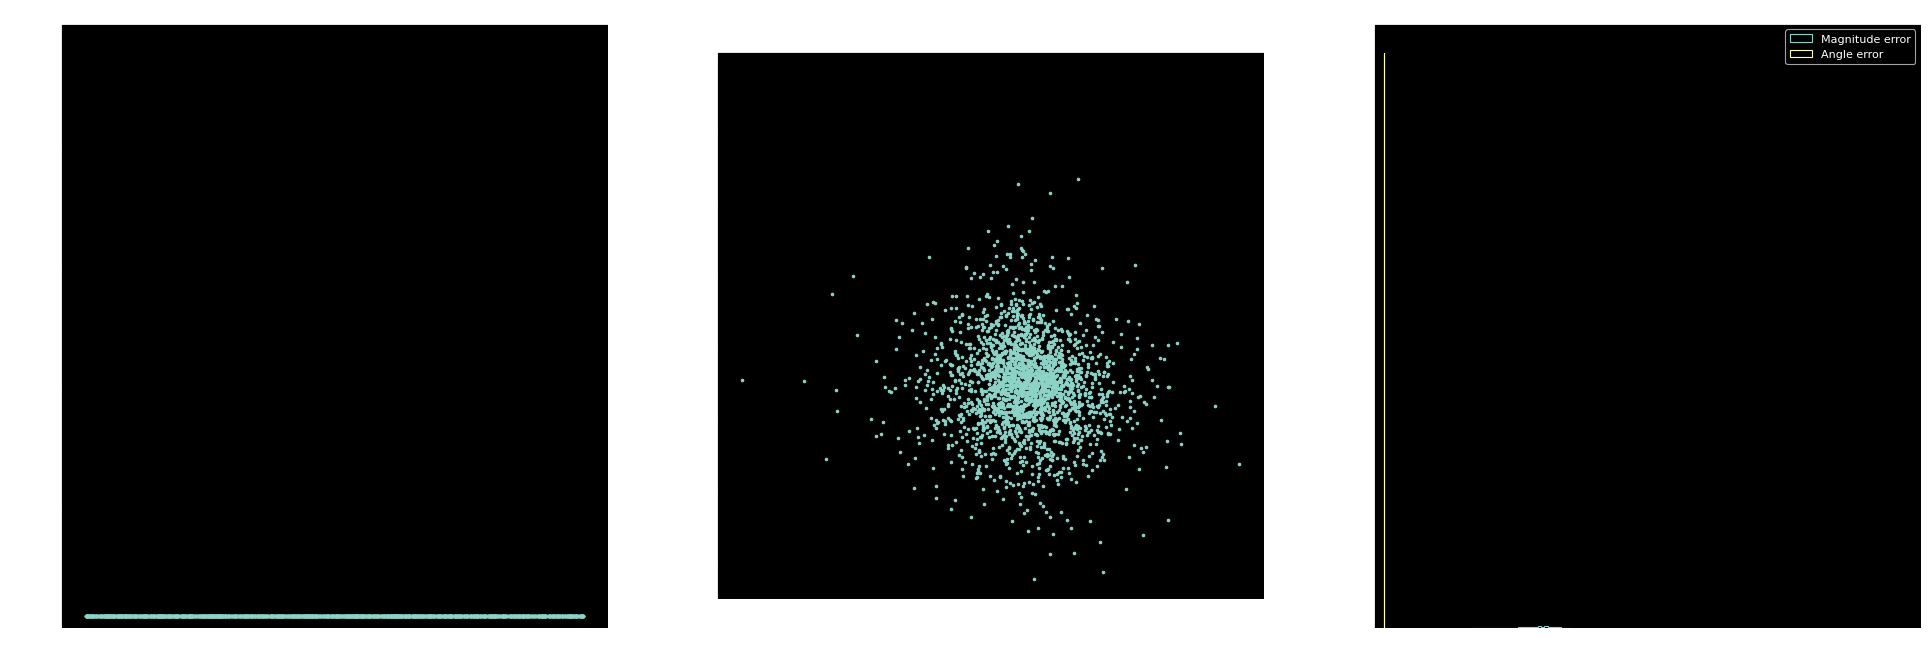

In [ ]:
# Error for circular mode with different number of iterations
for i in (10, 15, 20, 25, 30):
    print("%d CORDIC iterations"%(i))
    vis_rot_error_file("data/circ_rot/cr_%d_off_off_x2500.txt"%(i))

Circular rotation without constraints


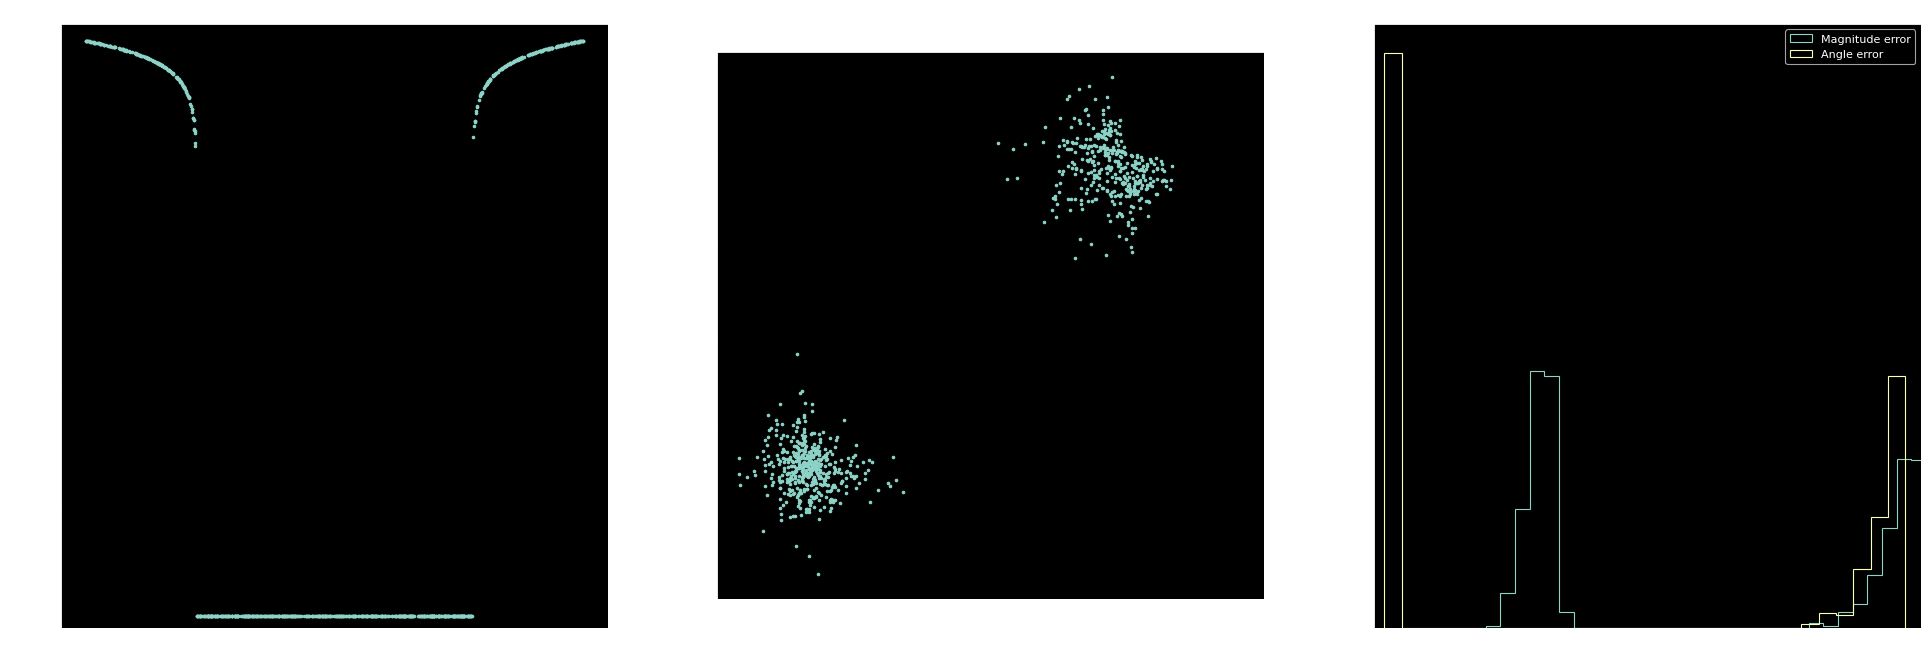

Circular rotation with constraints


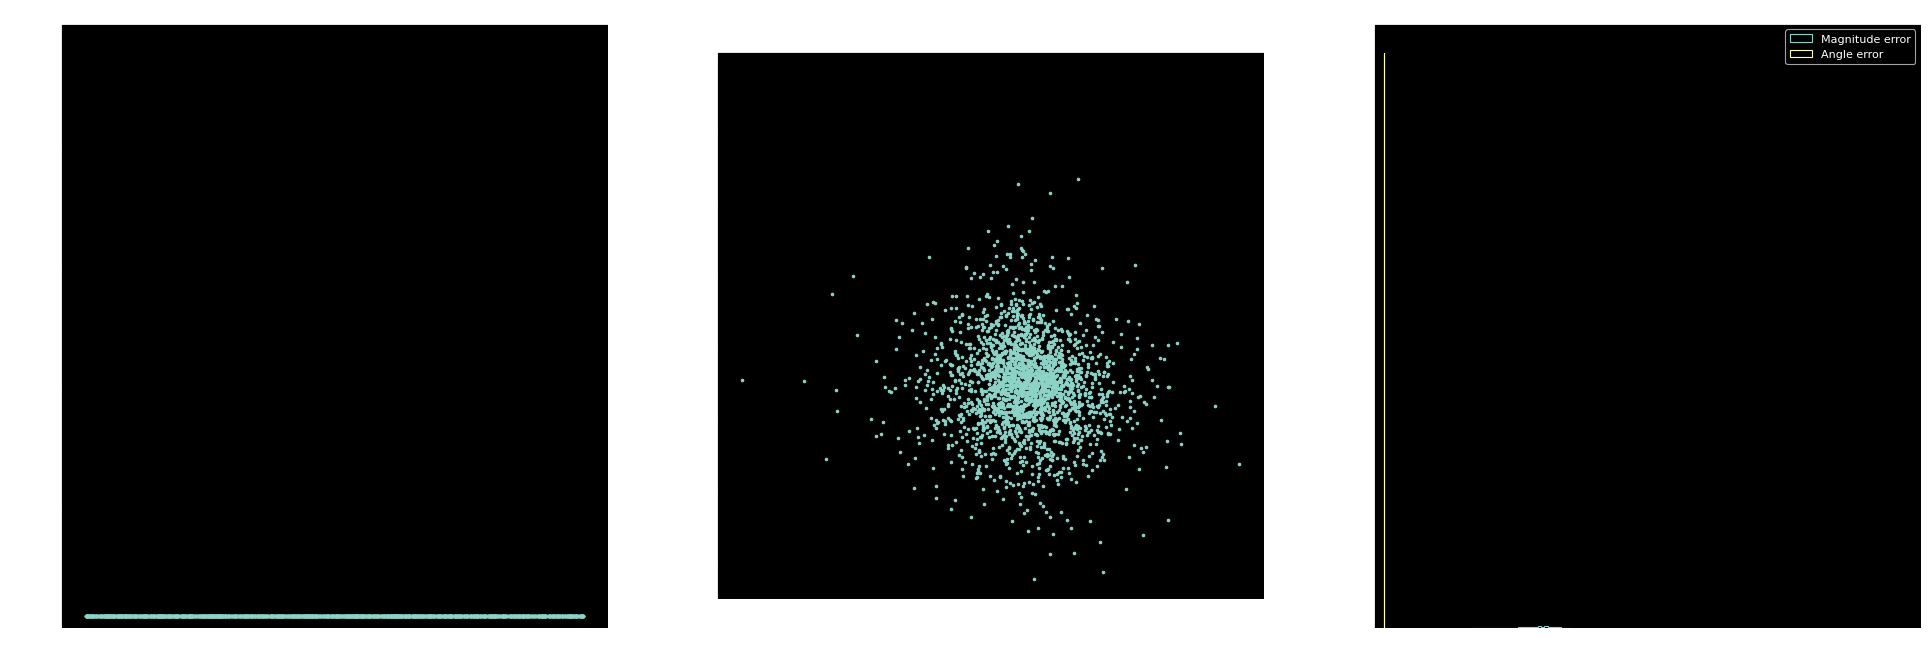

In [ ]:
# View inputs for full (including inputs that will lead to out of bounds outputs)
print("Circular rotation without constraints")
vis_rot_error_file("data/circ_rot/cr_30_off_off_x2500_full.txt")

print("Circular rotation with constraints")
vis_rot_error_file("data/circ_rot/cr_30_off_off_x2500.txt")

---

## Hyperbolic mode error analysis

Look at the following to see patterns in error for hyperbolic rotation mode for different number of CORDIC iterations and also compare the error plot when we do not apply the given constraints on angle, input values, etc

10 CORDIC iterations


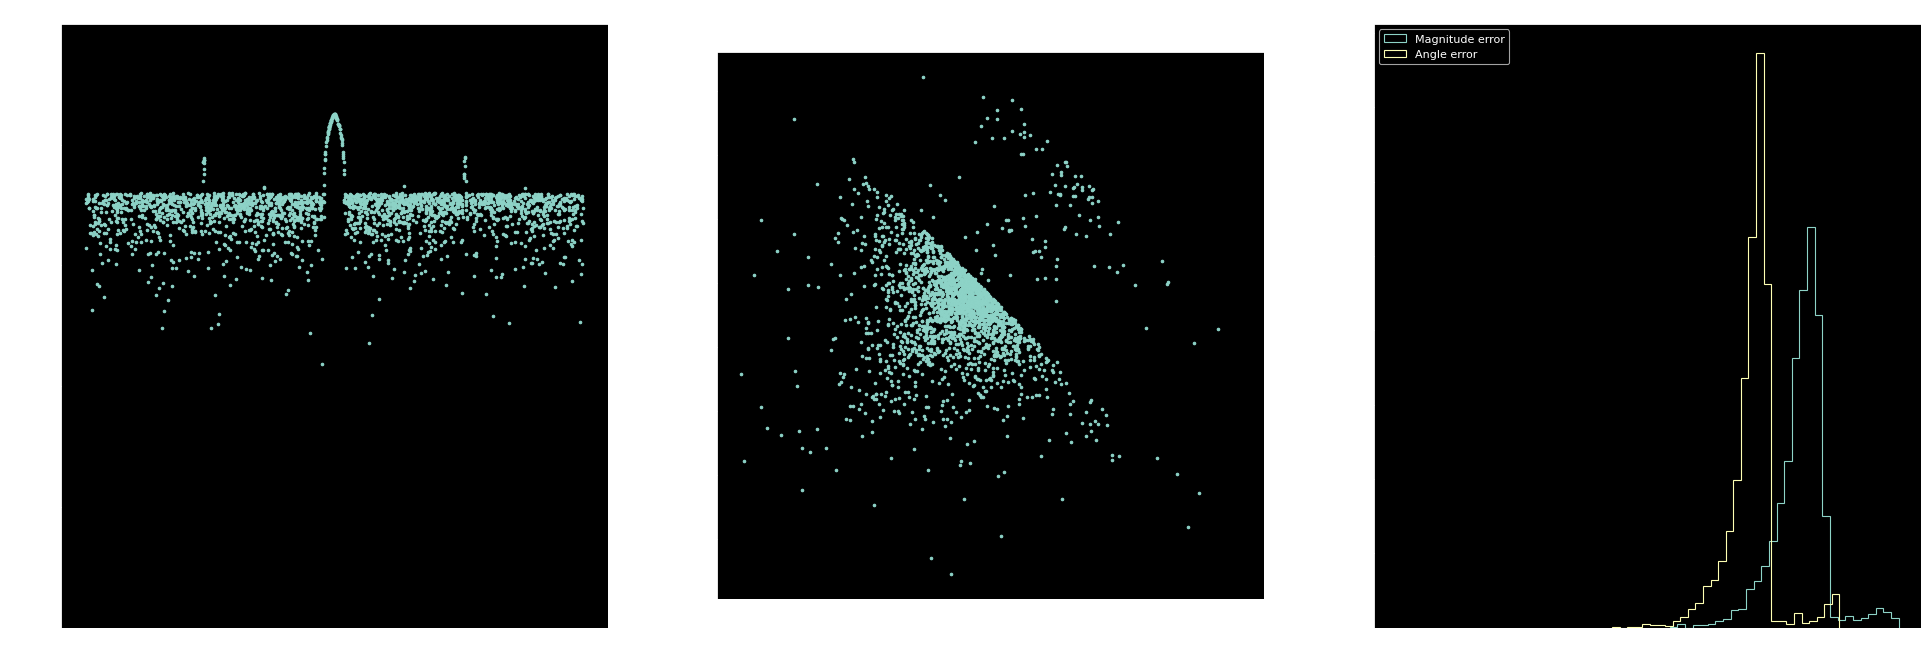

15 CORDIC iterations


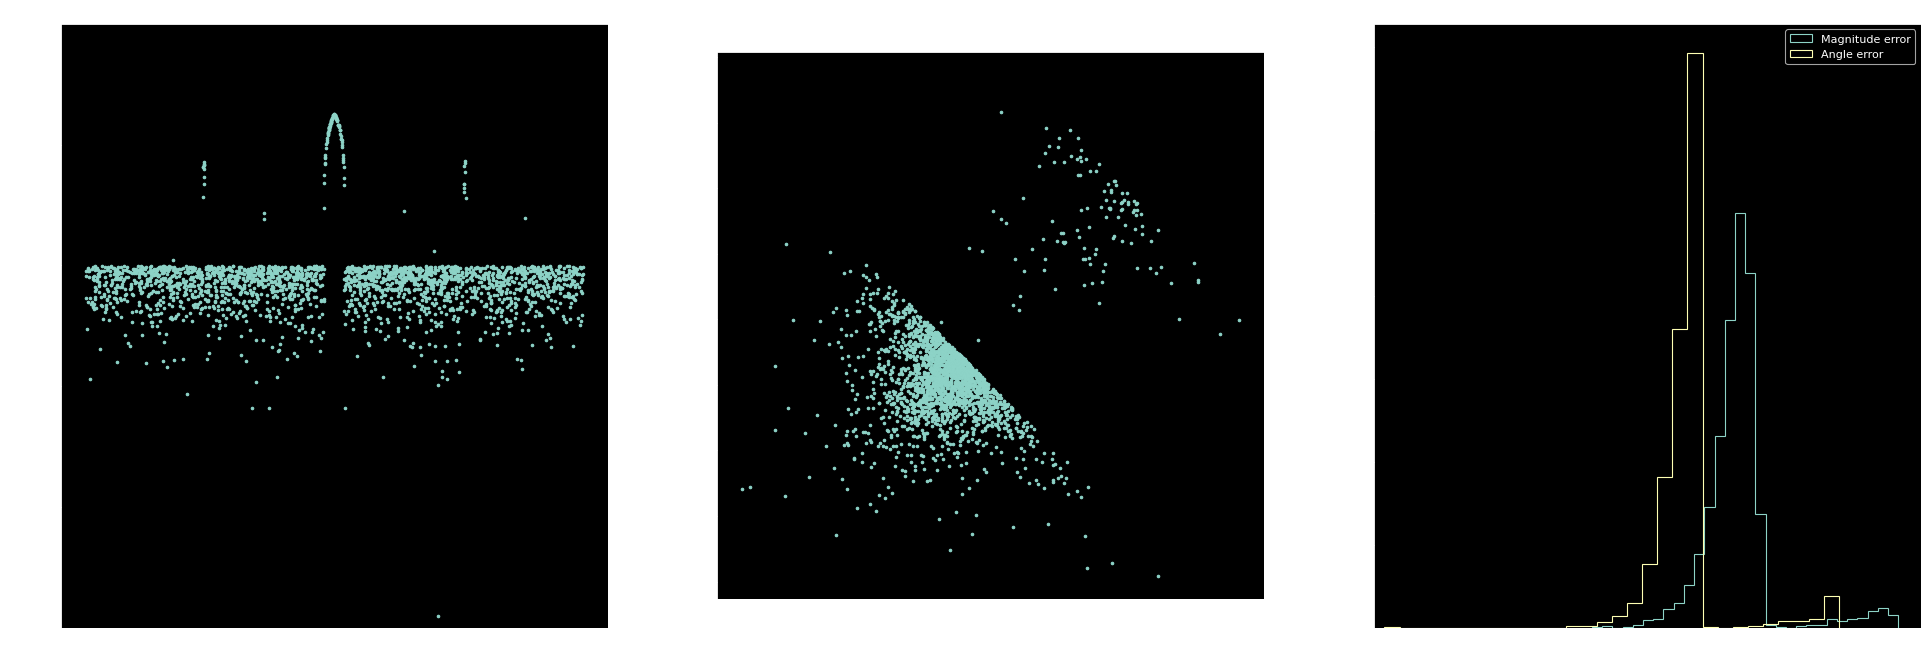

20 CORDIC iterations


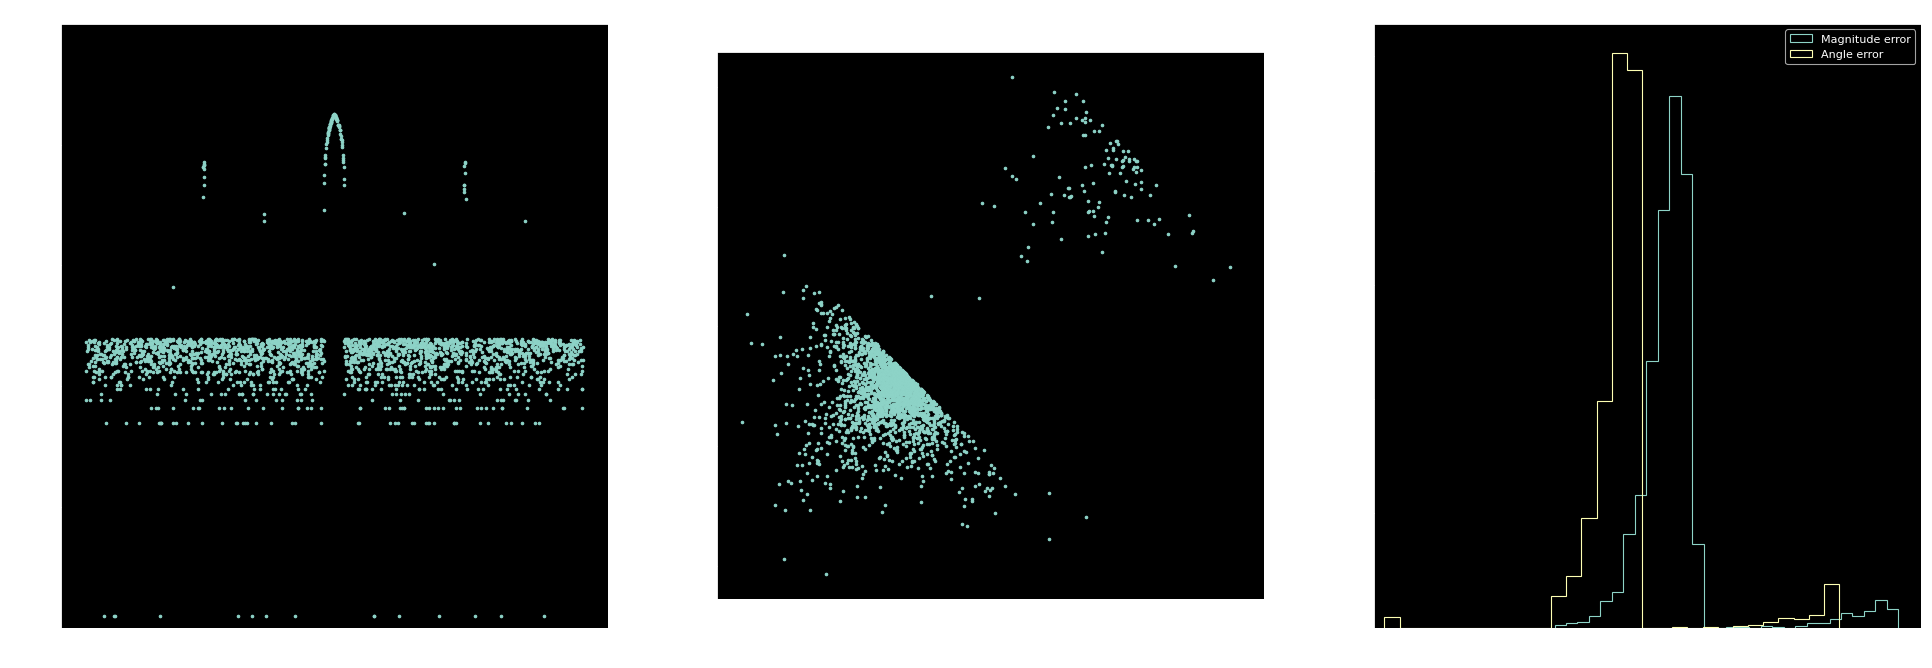

25 CORDIC iterations


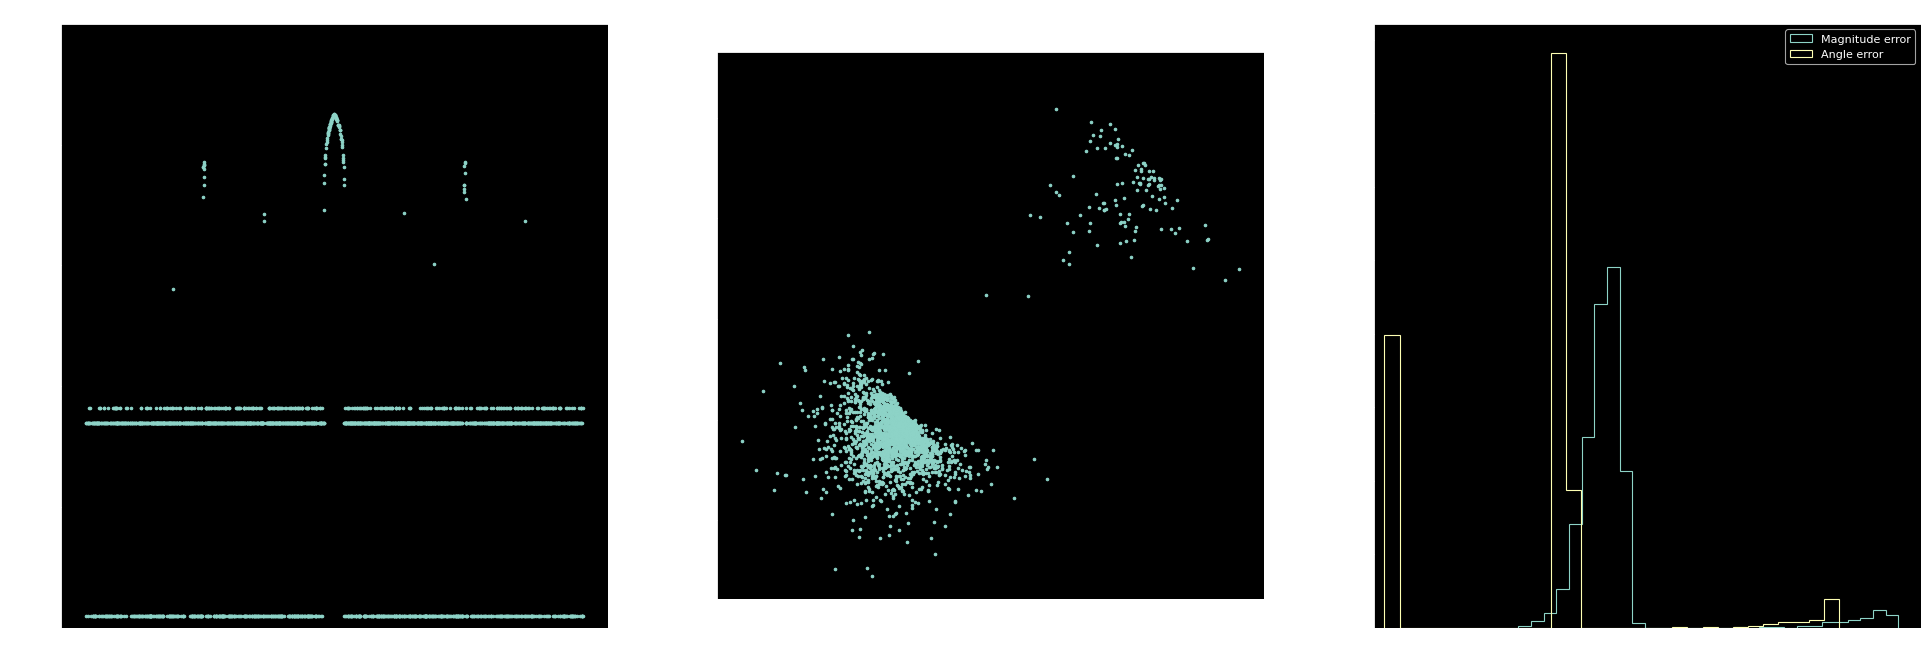

30 CORDIC iterations


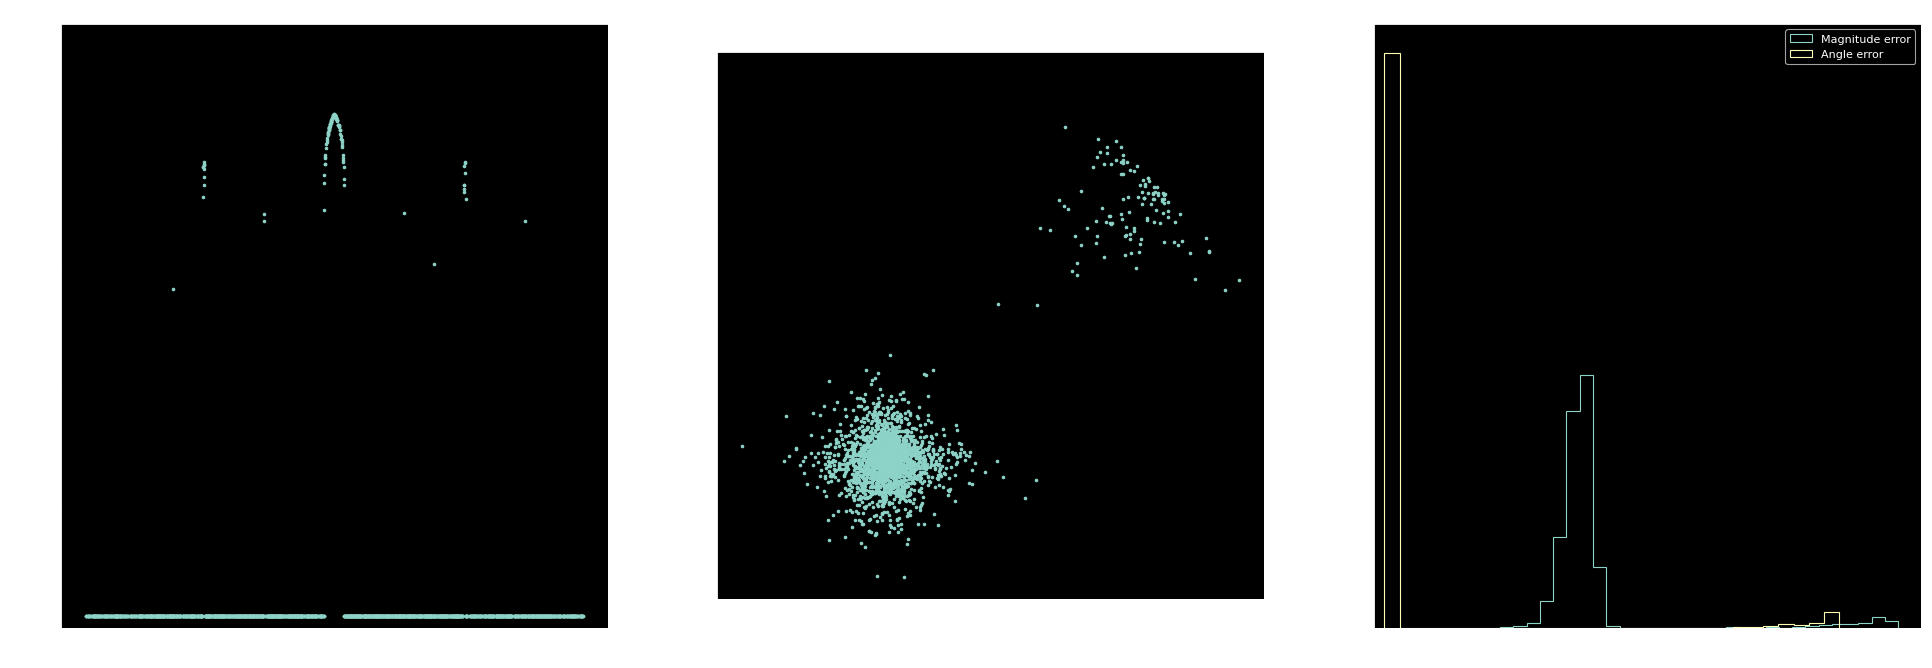

In [ ]:
# Error for hyperbolic mode with different number of iterations
for i in (10, 15, 20, 25, 30):
    print("%d CORDIC iterations"%(i))
    vis_rot_error_file("data/hyp_rot/hr_%d_off_off_x2500.txt"%(i))

Hyperbolic rotation without constraints


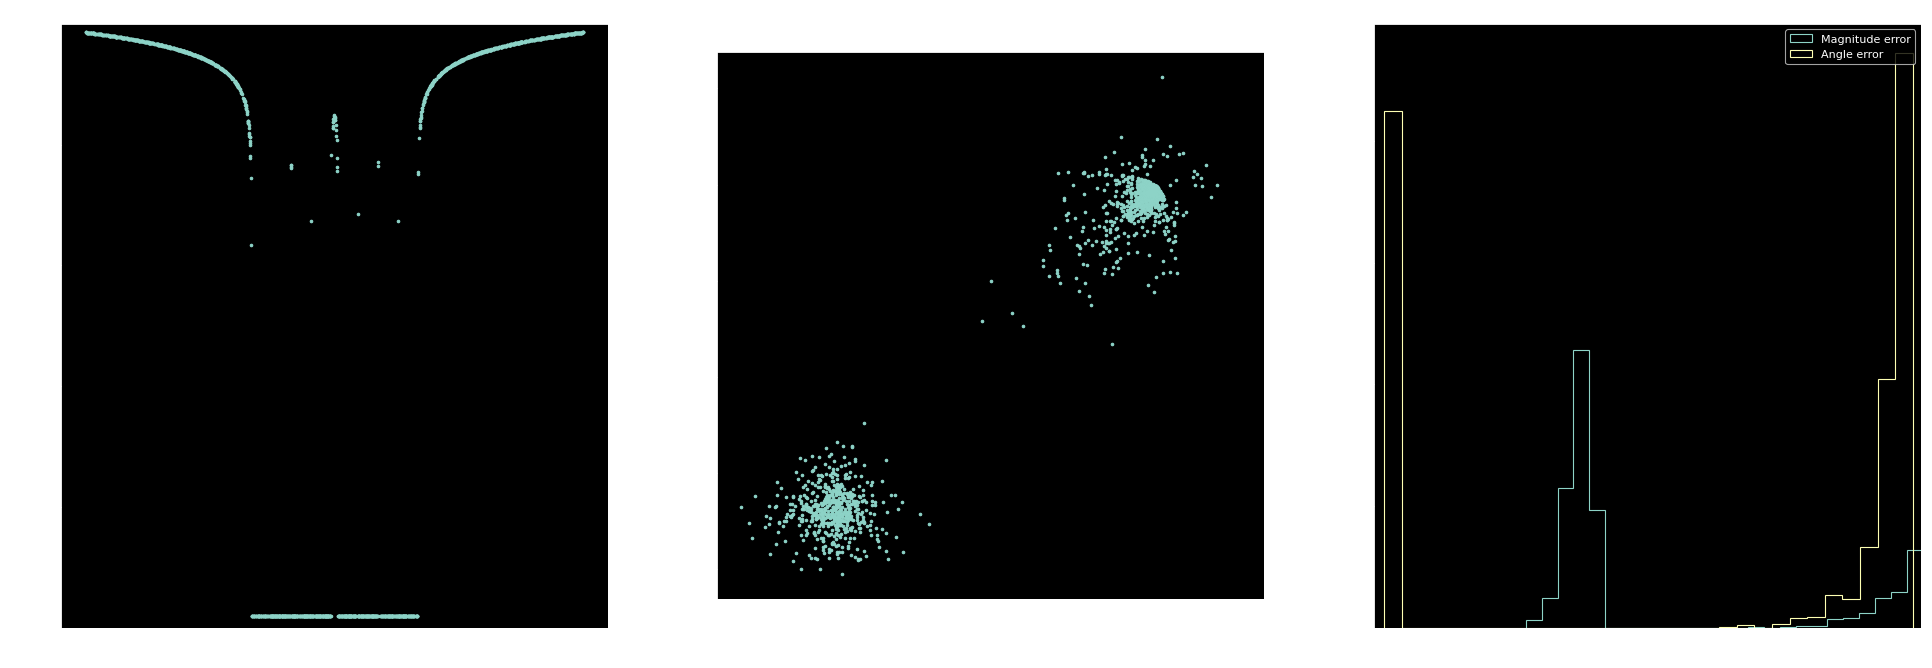

Hyperbolic rotation with constraints


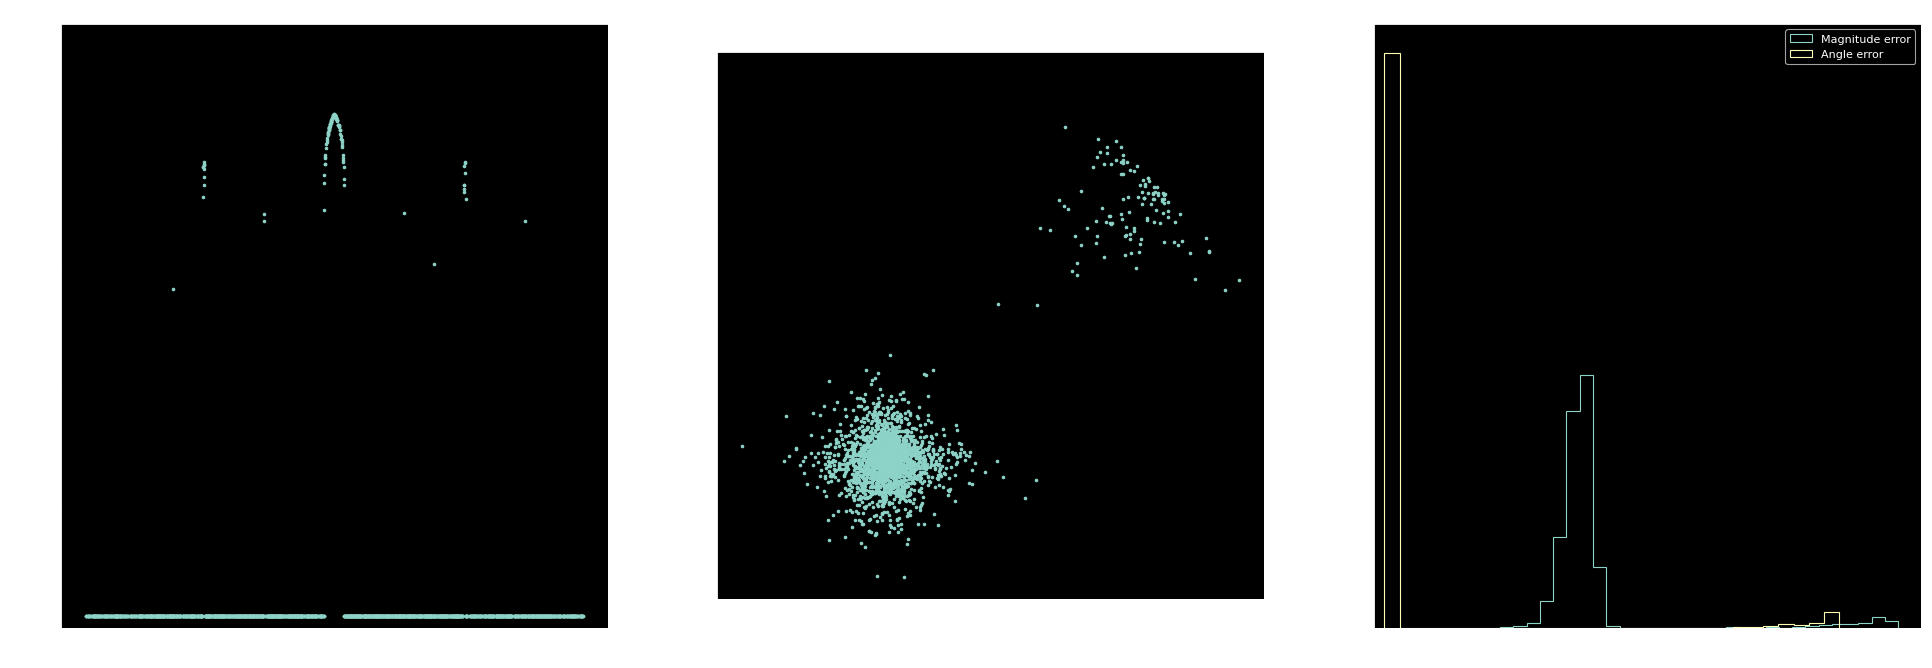

In [12]:
# View inputs for full (including inputs that will lead to out of bounds outputs)
print("Hyperbolic rotation without constraints")
vis_rot_error_file("data/hyp_rot/hr_30_off_off_x2500_full.txt")

print("Hyperbolic rotation with constraints")
vis_rot_error_file("data/hyp_rot/hr_30_off_off_x2500.txt")

---

## Rotation summary

Rotation error performance can be seen using these box-and-whisker plots. The whiskers extend from the lowest 5%ile to the upper 5%ile of data. The boxes extend from 25%ile to 75%ile and the median is shown inside the boxes. The lowest 5%ile and upper 5%ile of data are shown as points

Box and whiskers plot for hyperbolic error


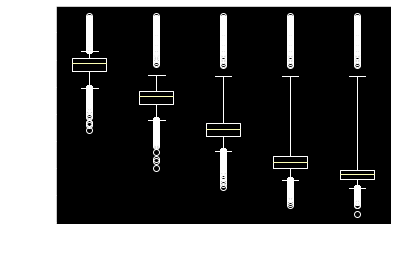

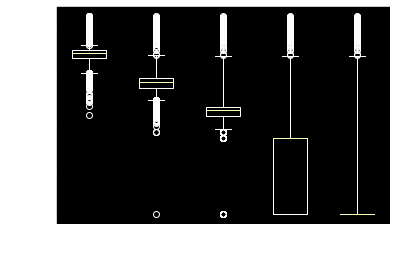

In [ ]:
mag_err = []
ang_err = []
iter_ls = []

for i in (10, 15, 20, 25, 30):
    f1 = log_file("data/hyp_rot/hr_%d_off_off_x2500.txt"%(i))
    f1.parse()
    mag_err.append(np.log10(np.linalg.norm(f1.err_good[:, 0:2], axis=1)) * 20)
    ang_err.append(20 * np.log10(np.maximum(1e-10, np.abs(f1.err_good[:, 2])) / 180))
    iter_ls.append(i)        

print("Box and whiskers plot for hyperbolic error")

plt.boxplot(mag_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Magnitude error (dB)")
plt.show()

plt.boxplot(ang_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Angle residual (dB)")
plt.show()

Box and whiskers plot for circular error


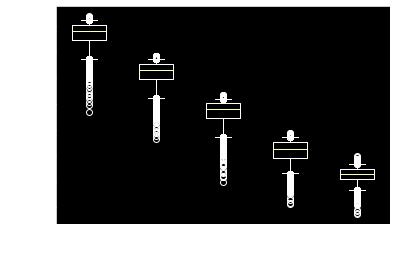

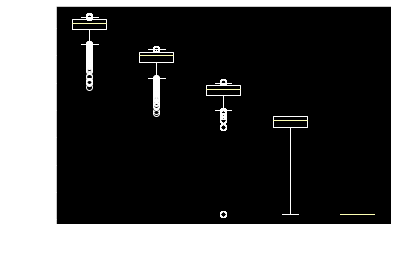

In [ ]:
mag_err = []
ang_err = []
iter_ls = []

for i in (10, 15, 20, 25, 30):
    f1 = log_file("data/circ_rot/cr_%d_off_off_x2500.txt"%(i))
    f1.parse()
    mag_err.append(np.log10(np.linalg.norm(f1.err_good[:, 0:2], axis=1)) * 20)
    ang_err.append(20 * np.log10(np.maximum(1e-10, np.abs(f1.err_good[:, 2])) / 180))
    iter_ls.append(i)        
        
print("Box and whiskers plot for circular error")

plt.boxplot(mag_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Magnitude error (dB)")
plt.show()

plt.boxplot(ang_err, labels=iter_ls, whis=[5, 95])
plt.xlabel("Number of iterations")
plt.ylabel("Angle residual (dB)")
plt.show()